In [ ]:
# here only executting stuff. no functions or classes

In [ ]:
## um die models und functions hier nutzen zu können, muss man die datein als module importieren. 
## das geht auch wenn das notebeooks sind, ist aber deutlich einfacher, wenn es einfach .py dateien sind.

In [ ]:
!pip install -r requirements.txt

ERROR: fid-score 0.1.3 has requirement scipy==1.3.2, but you'll have scipy 1.6.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## H2Z


In [ ]:
#!/usr/bin/env python3
#-*- coding:utf-8 -*-
#$ -l cuda=1 # remove this line when no GPU is needed!
#$ -q all.q # do not fill the qlogin queue
#$ -cwd # start processes in current working directory
#$ -V # provide environment variables to processes
#$ -t 1-8 # start 8 instances: to train different models in parallel
#Cluster settings, 
'''
try:
    model_param_id = int(os.environ['SGE_TASK_ID'])
except:
    print("no SGE_TASK_ID set, choosing default model parameters ")
    model_param_id = 0 #param_train_cycle_list[0] should be default model params
'''
import importlib
import models
import functions 
import torch
import torch.nn as nn
importlib.reload(models)
importlib.reload(functions)
import numpy as np
#different import way for cluster
'''
import imp
models = imp.load_source('models', './models.py')
functions = imp.load_source('functions', './functions.py')
'''

# init CycleGAN
genA2B = models.Generator(input_nc=3, output_nc=3, n_residual_blocks=9)
genB2A = models.Generator(input_nc=3, output_nc=3, n_residual_blocks=9)
discA  = models.Discriminator(input_nc=3)
discB  = models.Discriminator(input_nc=3)
classifier = models.Classifier().net
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
root_path_data = "./data/horse2zebra"
root_path_checkpoints = "./checkpoints/horse2zebra"

targetEpoch = 100

cycle  = models.CycleGAN(genA2B, genB2A, discA, discB, classifier, device, root_path_data, root_path_checkpoints)


# parameter comibination tested for this milestone
param_train1  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r9_advMSE_l10", resnet_blocks=9, loss_adv=torch.nn.MSELoss(), lambdas=(10,0.5)) # default
param_train2  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r9_advMSE_l5" , resnet_blocks=9, loss_adv=torch.nn.MSELoss(), lambdas=(5,0.5))
param_train3  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r9_advL1_l10", resnet_blocks=9, loss_adv=torch.nn.L1Loss(), lambdas=(10,0.5))
param_train4  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r9_advL1_l5" , resnet_blocks=9, loss_adv=torch.nn.L1Loss(), lambdas=(5,0.5))
param_train5  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r5_advMSE_l10", resnet_blocks=5, loss_adv=torch.nn.MSELoss(), lambdas=(10,0.5))
param_train6  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r5_advMSE_l5" , resnet_blocks=5, loss_adv=torch.nn.MSELoss(), lambdas=(5,0.5))
param_train7  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r5_advL1_l10", resnet_blocks=5, loss_adv=torch.nn.L1Loss(), lambdas=(10,0.5))
param_train8  = models.Param(channels = 3, epochs = targetEpoch, size= 256,  name ="cycle_r5_advL1_l5" , resnet_blocks=5, loss_adv=torch.nn.L1Loss(), lambdas=(5,0.5))
param_train_cycle_list = [param_train1, param_train2, param_train3, param_train4, param_train5, param_train6, param_train7, param_train8]

# paramter to load the background error verison. since this extension needed major changes in training/loaded training was done locally.
param_back_err = models.Param(name ="background_default", epochs = 80)

# paramters needed to call eval_testset() function
param_eval_testset = models.Param(channels = 3, size= 256) 

# parameters used for training the classifier
param_train_classifier = models.Param(channels = 3, epochs = targetEpoch, size = 256, name = "classifier_test")

/shared-libs/python3.7/py/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


' train_classifier() is used to train the classifier that is used for the evaluation of the domain transfer and the attribution ratio.\nsince for the horse-zebra data a classifier is already trained, call cycle.load_classifier() instead of cycle.train_classifier'

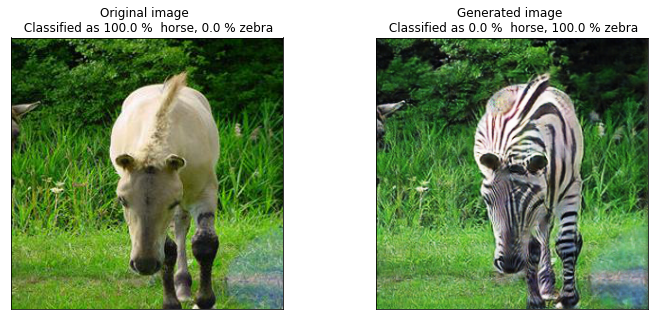

In [ ]:
## loading for cluster
#load the model_param_id parameters (used for parallel training on cluster)
#param_train_cycle = param_train_cycle_list[model_param_id-1]
#cycle.train(param_train_cycle)   
#sys.exit("Training done")     

'''for eval_testset() to work, load_classifier() and load_cycle_nets() with chosen parameters needs to be called first'''
#cycle.load_classifier()
#cycle.load_cycle_nets(epoch = 100, model_name = param_train_cycle_list[0].name) # #param_train_cycle_list[0].name) # param_back_err.name) #

'''eval_testset() calculates the classifiers prediction for several pairs of original and generted images
it returns the examined pictures in batch-form and two lists storing the classifiers prediction for the batches respectively
if plot = True all chosen pairs as plottet with their classification scores '''
#org, gen, org_percentage, gen_percentage = cycle.eval_testset(param_eval_testset, source_domain= "A",pic_number_low =11 , pic_number_high = 11,
#                                                            pre_generated = False,  plot = True, explain = False) 


''' train_classifier() is used to train the classifier that is used for the evaluation of the domain transfer and the attribution ratio.
since for the horse-zebra data a classifier is already trained, call cycle.load_classifier() instead of cycle.train_classifier'''
#cycle.train_classifier(param_train_classifier) 


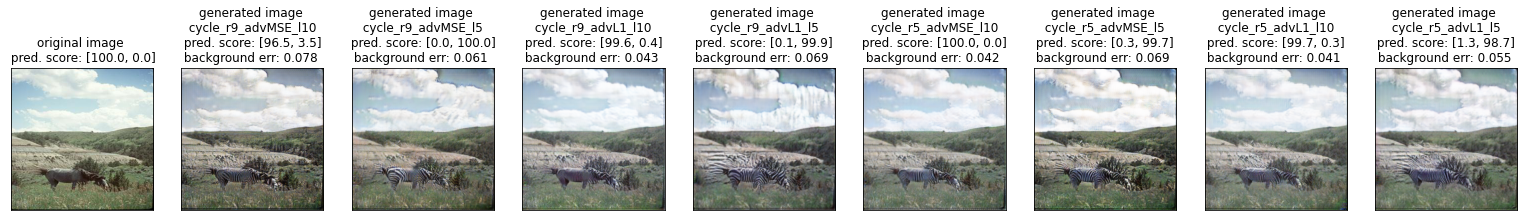

In [ ]:
''' fuctions.plot_generated_images() generates and plots images for a chosen source image for every trained parameter setting
the respective prediction scores from cycle.flassifier and the respective background error are shown as well'''
importlib.reload(functions)
functions.plot_generated_images(model = cycle, img_idx = 85, param_list = param_train_cycle_list, source_domain = "A")



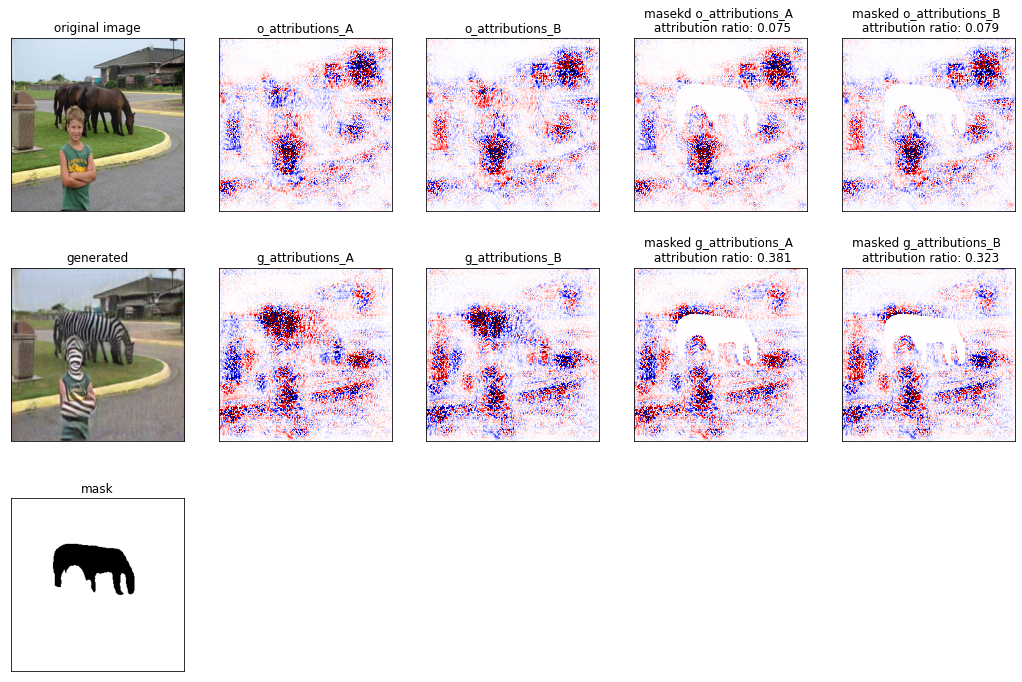

In [ ]:
''' intit the classifier and load wanted cycle model '''
# cycle.load_classifier()
# cycle.load_cycle_nets(epoch = 100, model_name = param_train_cycle_list[4].name)

''' functions.get_prediction_matrix calculates (or loads) an overview matrix for all prediction scores from cycle.classifier for every image of the chosen domain
functions.plot_prediction_matrix plots the given prediction matrix and caclulates average scores per parameter setting'''
# grid = functions.get_prediction_matrix(cycle, param_train_cycle_list, pre_calculated=True, source_domain = "A")
# functions.plot_prediction_matrix(grid,param_train_cycle_list, source_domain= "A")


''' get_background_loss_matrix() and plot_background_matrix() work similar to get_prediction_matrix() and plot_prediction_matrix(), but for 
the background error instead of the predictions scores'''
# losses = functions.get_background_loss_matrix(model = cycle, param_list = param_train_cycle_list, pre_calculated=True, source_domain = "A")
# functions.plot_backgorund_loss_matrix(losses, param_list = param_train_cycle_list , source_domain= "A" )

''' before calling cacl_background_loss() manually, weights need to be initialized using load_cycle_nets()
 calc_background_loss() is the funtion that gets called several times in get_background_loss_matrix()'''
# loss = functions.calc_background_loss(model = cycle, source_domain = "B", img_idx = 1, masks_precalculated = True, plot = True)

''' get_attribution_matrix() and plot_attribution_matrix() work similar to the above get and plot matrix functions, but this time for the 
attribution ratio. '''
# matrix = functions.get_attribution_ratio_matrix(model = cycle, param_list = param_train_cycle_list, pre_calculated=True, source_domain = "A")
# functions.plot_attribution_ratio_matrix(matrix = matrix, param_list = param_train_cycle_list , source_domain= "A")

''' estimate_relevance_location() calculates and plots the attribution maps for a given image and its generated counterpart. 
also the  respective attribution ratio is calculated. before calling estimate_relevance_location() the classifier and the nets have to be loaded with
load_classifier() and load_cycle_nets() '''
#ratio_o_A, ratio_o_B, ratio_g_A, ratio_g_B = functions.estimate_relevance_location(model = cycle, source_domain = "A", img_idx = 88, masks_precalculated = True)

In [ ]:
res=functions.calc_fid_scores(model=cycle, param_list=param_train_cycle_list)

creating save folder: ./data/horse2zebra/cycle_r9_advMSE_l10/genA  and  ./data/horse2zebra/cycle_r9_advMSE_l10/genB
finished domain A
finished domain B
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0bdc536b-2572-44c8-a59b-ca7176c44727' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>